In [1]:
%matplotlib inline
%load_ext autotime

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle 
import itertools
import matplotlib.pyplot as plt
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

from scipy import stats
from sklearn import preprocessing
# pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# classifiers you can use
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
#learning curves (note that sklearn puts this as "model selection")
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from plot_utils import plot_learning_curve, plot_validation_curve
# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from scipy import stats
from scipy.stats import zscore
import seaborn as sns
sns.set()

# dimensionality reduction
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import DBSCAN, KMeans

# clustering metrics
from sklearn.metrics import silhouette_score

# Feature elimination
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_recall_fscore_support

time: 690 ms


In [3]:
names =[
    'srcip',
    'srcport',
'dstip', 
'dstport',
'proto', 
'total_fpackets',
'total_fvolume' ,
'total_bpackets', 
'total_bvolume', 
'min_fpktl',
'mean_fpktl',
'max_fpktl',
'std_fpktl',
'min_bpktl', 
'mean_bpktl', 
'max_bpktl', 
'std_bpktl',
'min_fiat',
'mean_fiat',
'max_fiat',
'std_fiat',
'min_biat',
'mean_biat',
'max_biat',
'std_biat',
'duration',
'min_active',
'mean_active',
'max_active',
'std_active',
'min_idle',
'mean_idle',
'max_idle',
'std_idle',
'sflow_fpackets',
'sflow_fbytes',
'sflow_bpackets',
    'flow_bbytes',
'fpsh_cnt',
'bpsh_cnt',
'furg_cnt',
'burg_cnt',
'total_fhlen',
'total_bhlen'
]

time: 1.83 ms


In [4]:
data_normal = pd.read_csv('data_normal_new.out',names=names)
data_normal1 = pd.read_csv('data_normal_new1.out',names=names)
data_normal2 = pd.read_csv('data_normal_new2.out',names=names)
data_normal3 = pd.read_csv('data_normal_new3.out',names=names)
data_normal4 = pd.read_csv('data_normal_new4.out',names=names)

normal_data = pd.concat([data_normal,data_normal1,data_normal2,data_normal3,data_normal4],
                        ignore_index=True,sort=False)

normal_data = normal_data.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt',
                                'bpsh_cnt','furg_cnt','burg_cnt']
                               ,axis=1)
normal_data = normal_data.drop_duplicates()
normal_data['label']=np.zeros(len(normal_data),)
print(normal_data.shape)
normal_data = normal_data.sample(n=2000)

(16328, 36)
time: 693 ms


In [5]:
data_nerris = pd.read_csv('data_nerris.out',names=names)
data_nerris1 = pd.read_csv('data_nerris1.out',names=names)
data_nerris2 = pd.read_csv('data_nerris2.out',names=names)
nerris_data = pd.concat([data_nerris,data_nerris1,data_nerris2],ignore_index=True,sort=False)

nerris_data = nerris_data.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt','bpsh_cnt',
                                'furg_cnt','burg_cnt'],axis=1)
nerris_data = nerris_data.drop_duplicates()
nerris_data['label'] = np.ones(len(nerris_data),)
nerris_data = nerris_data.sample(n=2000)


time: 425 ms


In [6]:
data_rbot = pd.read_csv('data_rbot.out',names=names)
data_rbot1 = pd.read_csv('data_rbot1.out',names=names)
rbot_data = pd.concat([data_rbot,data_rbot1],ignore_index=True,sort=False)

rbot_data = rbot_data.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt','bpsh_cnt',
                            'furg_cnt','burg_cnt'],axis=1)
rbot_data = rbot_data.drop_duplicates()
rbot_data['label'] = np.full(len(rbot_data),2.0)
rbot_data = rbot_data.sample(n=2000)


time: 101 ms


In [7]:
data_nsis = pd.read_csv('data_nsis.out',names=names)

nsis_data = data_nsis.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt','bpsh_cnt',
                'furg_cnt','burg_cnt'],axis=1)
nsis_data = nsis_data.drop_duplicates()
nsis_data['label'] = np.full(len(nsis_data),3.0)
nsis_data = nsis_data.sample(n=2000)


time: 424 ms


In [8]:
data_virut = pd.read_csv('data_virut.out',names=names)
data_virut1 = pd.read_csv('data_virut1.out',names=names)
virut_data = pd.concat([data_virut,data_virut1],ignore_index=True,sort=False)

virut_data = virut_data.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt','bpsh_cnt',
                              'furg_cnt','burg_cnt'],axis=1)
virut_data = virut_data.drop_duplicates()
virut_data['label'] = np.full(len(virut_data),4.0)
virut_data = virut_data.sample(n=2000)


time: 402 ms


In [9]:
data_murlo = pd.read_csv('data_murlo.out',names=names)

murlo_data = data_murlo.drop(['srcip','srcport','dstip','dstport','proto','fpsh_cnt','bpsh_cnt',
                              'furg_cnt','burg_cnt'],axis=1)
murlo_data = murlo_data.drop_duplicates()

murlo_data['label'] = np.full(len(murlo_data),5.0)
murlo_data = murlo_data.sample(n=2000)

time: 434 ms


In [10]:
data_loaded = [normal_data,nerris_data,rbot_data,nsis_data,virut_data,murlo_data]
data = pd.concat(data_loaded,ignore_index=True,sort=False)
data = data.drop_duplicates()

time: 401 ms


In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,35]

time: 446 ms


In [12]:
print(X.shape)
print(y.shape)

(12000, 35)
(12000,)
time: 428 ms


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.2)
label=['normal','nerris','rbot','nsis','virut','murlo']

time: 405 ms


In [14]:
def precision_recall_f1score_table(y_test,y_pred):
    table = precision_recall_fscore_support(y_test,y_pred,average=None)
    data = table[:-1]
    row_label = ['Precision','Recall','F1-score']
    chart = pd.DataFrame(data,row_label,label)
    print(chart)

time: 413 ms


In [15]:
def confusion_matrix_chart(y_test,y_pred,estimator):
    estimator.fit(X_train,y_train)
    title = "Confusion Matrix"
    disp = plot_confusion_matrix(estimator, X_test, y_test,
                             display_labels=label,cmap=plt.cm.Blues,values_format='d')
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.show()

time: 525 ms


In [16]:
rf_clf = RandomForestClassifier(n_estimators=128,max_features=16,criterion='gini')
svc_clf = SVC(C=1.0,kernel='rbf')
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,),activation='relu',solver='adam',max_iter=200)
clf = [rf_clf,svc_clf,mlp_clf]

time: 443 ms


With Normalization
RandomForestClassifier
f1 score : 0.9073503209194933
accuracy score: 0.9079166666666667
             normal    nerris      rbot      nsis     virut     murlo
Precision  0.980000  0.814324  0.963145  0.968000  0.750567  0.985000
Recall     0.970297  0.718970  0.992405  0.978437  0.829574  0.975248
F1-score   0.975124  0.763682  0.977556  0.973190  0.788095  0.980100
Confusion Matrix
[[393   0   4   7   0   0]
 [  6 306   1   3 109   2]
 [  0   1 392   0   0   2]
 [  1   6   0 364   0   0]
 [  0  65   2   1 329   2]
 [  1   3   7   1   0 392]]


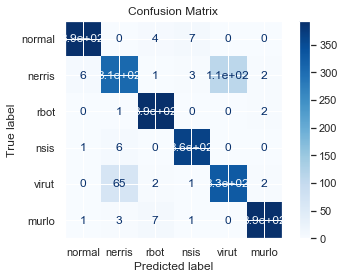

SVC
f1 score : 0.7636832527105465
accuracy score: 0.7658333333333334
             normal    nerris      rbot      nsis     virut     murlo
Precision  0.649798  0.647687  0.964865  0.862694  0.572565  0.975410
Recall     0.794554  0.426230  0.903797  0.897574  0.721805  0.883663
F1-score   0.714922  0.514124  0.933333  0.879789  0.638581  0.927273
Confusion Matrix
[[321  24   5  22  30   2]
 [ 54 182   1   5 179   6]
 [ 13  20 357   4   1   0]
 [ 20  12   2 333   3   1]
 [ 72  37   1   1 288   0]
 [ 14   6   4  21   2 357]]


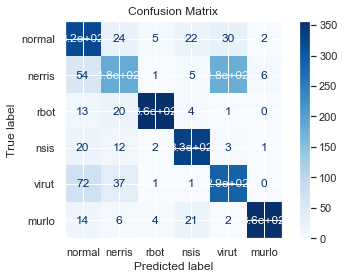

/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier
f1 score : 0.7222608218893847
accuracy score: 0.7283333333333334
             normal    nerris      rbot      nsis     virut     murlo
Precision  0.671835  0.633333  0.931398  0.827411  0.553030  0.782805
Recall     0.643564  0.400468  0.893671  0.878706  0.731830  0.856436
F1-score   0.657396  0.490674  0.912145  0.852288  0.629989  0.817967


/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix
[[252  26   6  36  34  50]
 [ 59 171   1   9 167  20]
 [ 19   4 348  21   0   3]
 [  5  22   0 336   2   6]
 [ 65  94   0   4 236   0]
 [ 11   6   5  27   2 353]]


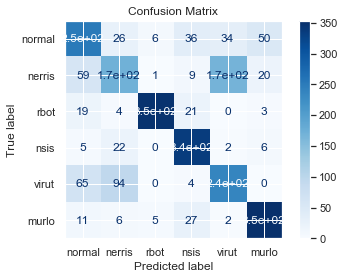

time: 28.9 s


In [17]:
print("With Normalization")
for c in clf:
    estimator_clf = make_pipeline(StandardScaler(),c)
    estimator_clf.fit(X_train,y_train)
    y_pred = estimator_clf.predict(X_test)
    print(f"{c.__class__.__name__}")
    print(f"f1 score : {f1_score(y_test,y_pred,average='weighted')}")
    print(f"accuracy score: {accuracy_score(y_test,y_pred)}")
    precision_recall_f1score_table(y_test,y_pred)
    confusion_matrix_chart(y_test,y_pred,estimator_clf)

## Training the models

In [18]:
rf_clf = RandomForestClassifier()
svc_clf = SVC()
mlp_clf = MLPClassifier()
clfs = [rf_clf,svc_clf,mlp_clf]

time: 851 µs


RandomForestClassifier
The mean score is 0.9091049909550966
SVC
The mean score is 0.7533890242069088
MLPClassifier
The mean score is 0.8143159626216534


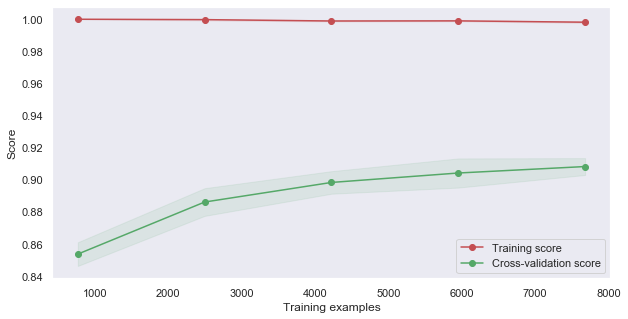

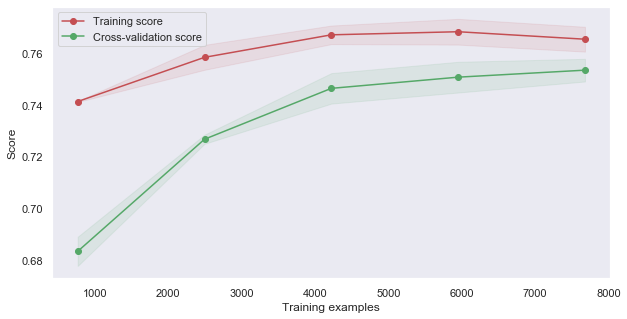

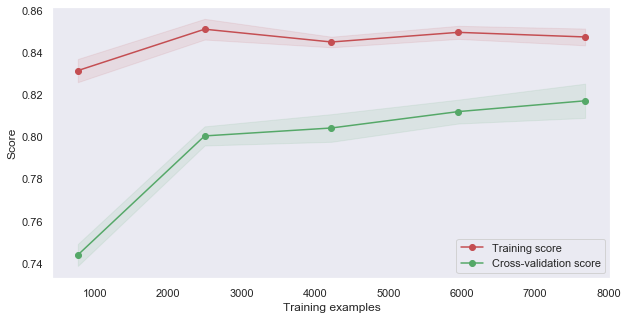

time: 1min 24s


In [19]:
for c in clfs:
    print(f"{c.__class__.__name__}")
    estimator = make_pipeline(StandardScaler(),c)
    f1 = make_scorer(f1_score,average='weighted')
    plot_learning_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,scoring=f1)
    
    scores = cross_val_score(estimator,X_train,y_train,cv=5,n_jobs=-1,scoring=f1)
    print(f"The mean score is {scores.mean()}")
    

## Random Forest Classifier

In [20]:
estimator = make_pipeline(StandardScaler(),rf_clf)

time: 611 µs


<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

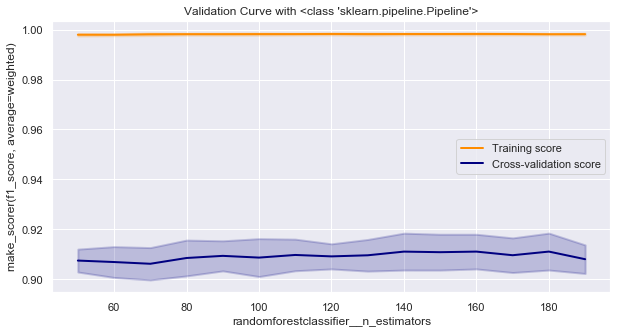

time: 44.1 s


In [21]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='randomforestclassifier__n_estimators',
                      param_range=np.arange(50,200,10),scoring=f1)

<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

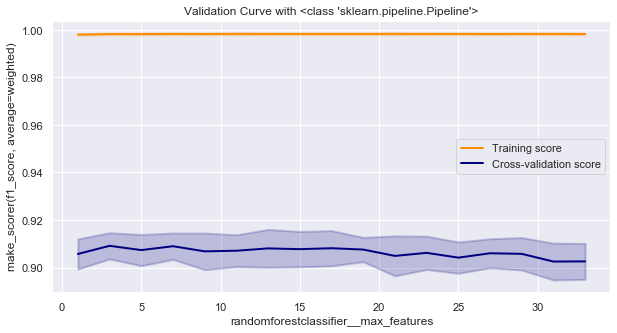

time: 1min 47s


In [22]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='randomforestclassifier__max_features',
                   param_range=np.arange(1,35,2),scoring=f1)

<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

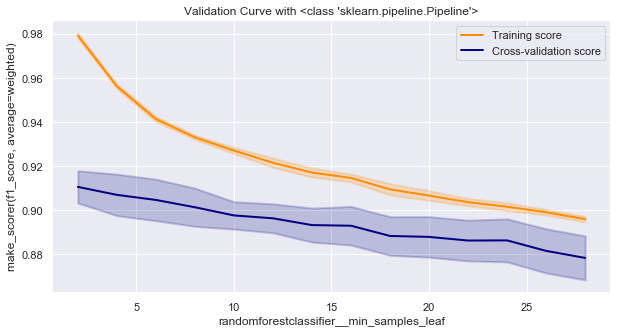

time: 28.4 s


In [23]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='randomforestclassifier__min_samples_leaf',
                  param_range=np.arange(2,30,2),scoring=f1)

Based on the curves, it seems like the values used by the authors were the best for RF. So

In [24]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9095833333333333
time: 1.69 s


In [25]:
print(f1_score(y_test,y_pred,average='weighted'))

0.9092056346009995
time: 3.17 ms


Let's plot confusion matrix

Confusion Matrix
[[393   1   3   7   0   0]
 [  5 312   1   4 104   1]
 [  1   1 391   0   0   2]
 [  1   6   0 363   1   0]
 [  0  64   3   1 330   1]
 [  1   1   7   0   1 394]]


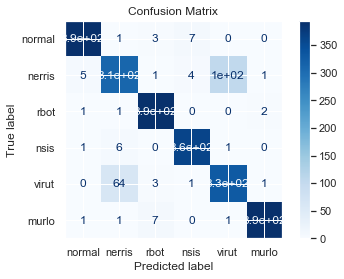

              precision    recall  f1-score   support

      normal       0.98      0.97      0.98       404
      nerris       0.81      0.73      0.77       427
        rbot       0.97      0.99      0.98       395
        nsis       0.97      0.98      0.97       371
       virut       0.76      0.83      0.79       399
       murlo       0.99      0.98      0.98       404

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400

time: 631 ms


In [26]:
title = "Confusion Matrix"
disp = plot_confusion_matrix(estimator, X_test, y_test,
                             display_labels=label,cmap=plt.cm.Blues,values_format='d')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()
print(classification_report(y_test, y_pred, target_names=label,zero_division=0))

## SVM

In [27]:
estimator = make_pipeline(StandardScaler(),svc_clf)

time: 101 ms


<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

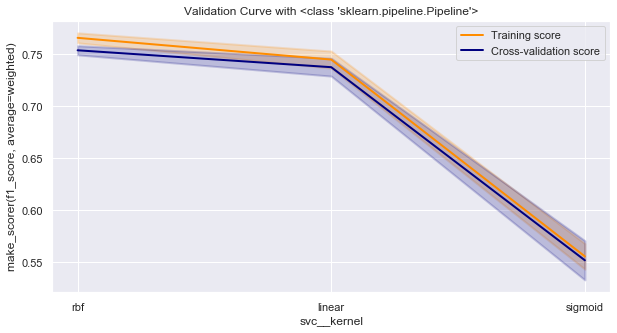

time: 26.9 s


In [28]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='svc__kernel',
                      param_range=('rbf','linear','sigmoid'),scoring=f1)

<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

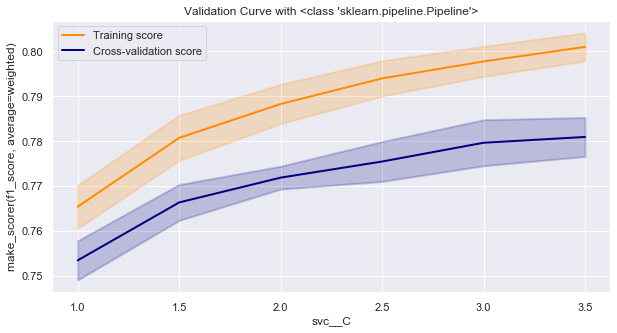

time: 42.7 s


In [30]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='svc__C',
                   param_range=np.arange(1.0,4.0,0.5),scoring=f1)

Based on the graph, I will choose the value C=2.0.

In [37]:
clf = SVC(C=2.0)
estimator = make_pipeline(StandardScaler(),clf)

time: 895 µs


In [38]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.79
time: 2.99 s


In [39]:
print(f1_score(y_test,y_pred,average='weighted'))
precision_recall_f1score_table(y_test,y_pred)

0.7857399451404162
             normal    nerris      rbot      nsis     virut     murlo
Precision  0.697228  0.709434  0.966408  0.861042  0.588119  0.978437
Recall     0.809406  0.440281  0.946835  0.935310  0.744361  0.898515
F1-score   0.749141  0.543353  0.956522  0.896641  0.657080  0.936774
time: 12.9 ms


Confusion Matrix
[[327  21   5  23  25   3]
 [ 50 188   1   6 178   4]
 [ 11   2 374   5   3   0]
 [  8  12   1 347   2   1]
 [ 62  37   1   2 297   0]
 [ 11   5   5  20   0 363]]


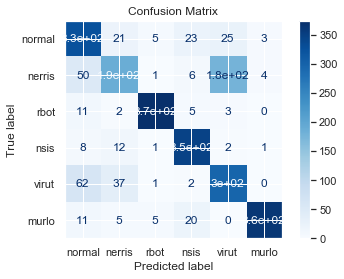

              precision    recall  f1-score   support

      normal       0.70      0.81      0.75       404
      nerris       0.71      0.44      0.54       427
        rbot       0.97      0.95      0.96       395
        nsis       0.86      0.94      0.90       371
       virut       0.59      0.74      0.66       399
       murlo       0.98      0.90      0.94       404

    accuracy                           0.79      2400
   macro avg       0.80      0.80      0.79      2400
weighted avg       0.80      0.79      0.79      2400

time: 806 ms


In [40]:
title = "Confusion Matrix"
disp = plot_confusion_matrix(estimator, X_test, y_test,
                             display_labels=label,cmap=plt.cm.Blues,values_format='d')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()
print(classification_report(y_test, y_pred, target_names=label,zero_division=0))

## MLP

In [41]:
estimator = make_pipeline(StandardScaler(),mlp_clf)

time: 1.6 ms


<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

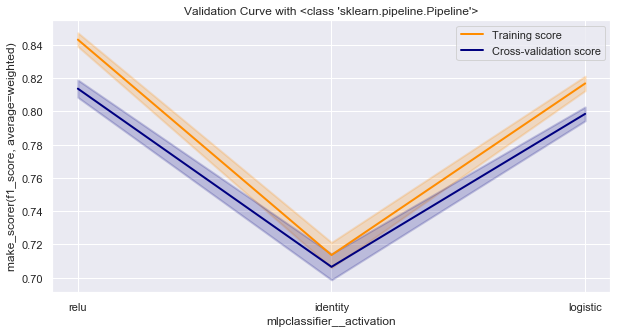

time: 36.2 s


In [42]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='mlpclassifier__activation',
                      param_range=('relu','identity','logistic'),scoring=f1)

<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

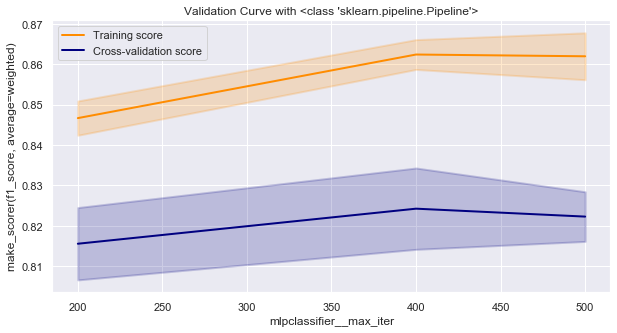

time: 1min 1s


In [43]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='mlpclassifier__max_iter',
                   param_range=(200,400,500),scoring=f1)

<module 'matplotlib.pyplot' from '/home/niranjan/miniconda3/envs/cyber_ml_course/lib/python3.7/site-packages/matplotlib/pyplot.py'>

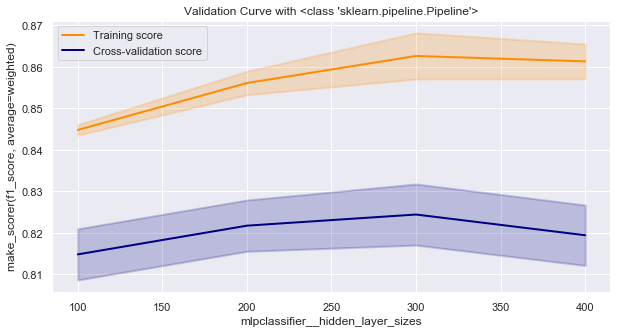

time: 1min 28s


In [45]:
plot_validation_curve(estimator,X_train,y_train,cv=5,n_jobs=-1,
                      param_name='mlpclassifier__hidden_layer_sizes',
                  param_range=np.arange(100,500,100),scoring=f1)

In [46]:
estimator = make_pipeline(StandardScaler(),MLPClassifier(hidden_layer_sizes=(300,),max_iter=400))

time: 2.17 ms


In [47]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8358333333333333
time: 15.5 s


In [48]:
print(f1_score(y_test,y_pred,average='weighted'))
precision_recall_f1score_table(y_test,y_pred)

0.8297822628914687
             normal    nerris      rbot      nsis     virut     murlo
Precision  0.838164  0.829060  0.945409  0.920513  0.602496  0.972362
Recall     0.858911  0.454333  0.964557  0.967655  0.847118  0.957921
F1-score   0.848411  0.586989  0.954887  0.943495  0.704167  0.965087
time: 15.1 ms


Confusion Matrix
[[347   5   8  21  23   0]
 [ 29 194   1   3 197   3]
 [  3   2 381   4   0   5]
 [  4   4   0 359   2   2]
 [ 27  28   3   2 338   1]
 [  4   1  10   1   1 387]]


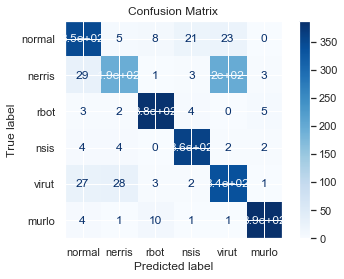

              precision    recall  f1-score   support

      normal       0.84      0.86      0.85       404
      nerris       0.83      0.45      0.59       427
        rbot       0.95      0.96      0.95       395
        nsis       0.92      0.97      0.94       371
       virut       0.60      0.85      0.70       399
       murlo       0.97      0.96      0.97       404

    accuracy                           0.84      2400
   macro avg       0.85      0.84      0.83      2400
weighted avg       0.85      0.84      0.83      2400

time: 780 ms


In [49]:
title = "Confusion Matrix"
disp = plot_confusion_matrix(estimator, X_test, y_test,
                             display_labels=label,cmap=plt.cm.Blues,values_format='d')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()
print(classification_report(y_test, y_pred, target_names=label,zero_division=0))